# Проверка гипотез по увеличению выручки в интернет-магазине

**Описание проекта:** 

Аналитики крупного интернет-магазина совместно с отделом маркетинга подготовили список гипотез для увеличения выручки.
Целью проведения исследования является анализ результатов проведенного A/B-теста.

**Описание данных:**
1. Файл /datasets/hypothesis.csv содержит описание 9-и гипотез по увеличению выручки интернет-магазина:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

2. В файлах /datasets/orders.csv и /datasets/visitors.csv описаны результаты проведенного A/B-теста: 

2.1. Файл /datasets/orders.csv содержит:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

2.2. Файл /datasets/visitors.csv содержит:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

**План выполнения проекта:**

1. Предобработка данных 


2. Приоритизация гипотез:

- Применение фреймворка ICE для приоритизации гипотез.
- Применение фреймворка RICE для приоритизации гипотез. 

3. Анализ A/B-теста:

- Построение графика кумулятивной выручки по группам. 
- Построение графика кумулятивного среднего чека по группам.
- Построение графика относительного изменения кумулятивного среднего чека группы B к группе A.
- Построение графика кумулятивного среднего количества заказов на посетителя по группам.
- Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
- Построение точечного графика количества заказов по пользователям.
- Расчет 95-го и 99-го перцентилей количества заказов на пользователя; выбор границы для определения аномальных пользователей.
- Построение точечного графика стоимостей заказов. 
- Расчет 95-го и 99-го перцентилей стоимости заказов; выбор границы для определения аномальных заказов.
- Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 
- Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. 
- Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 
- Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Принятие решения по результатам теста.

### Предобработка данных

In [1]:
# Импортирую нужные библиотеки
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
pd.set_option('display.max_colwidth', False)

In [2]:
# Загружаю данные
try:
    data, orders, visitors = (
        pd.read_csv('hypothesis.csv'), 
        pd.read_csv('orders.csv'), 
        pd.read_csv('visitors.csv')
    )
except:
    data, orders, visitors = (
        pd.read_csv('/datasets/hypothesis.csv'), 
        pd.read_csv('/datasets/orders.csv'), 
        pd.read_csv('/datasets/visitors.csv')
    )

In [3]:
# Изучаю данные из файлов с гипотезами, заказами и посетителями
print('Гипотезы')
display(data)
display(data.info())
print()
print('Заказы')
display(orders)
display(orders.info())
print()
print('Посетители')
display(visitors)
display(visitors.info())

Гипотезы


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None


Заказы


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None


Посетители


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

In [4]:
# Для удобства работы с заголовками столбцов приведу их к нижнему регистру
data.columns = [x.lower() for x in data.columns.values]
orders.columns = [x.lower() for x in orders.columns.values]

In [5]:
# Приведу элементы столбцов 'date' таблиц orders и visitors к нужному формату
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Проверяю количество групп в А/В тесте

In [6]:
orders['group'].nunique()

2

В А/В-тесте 2 группы.

Нахожу даты начала и окончания теста

In [7]:
print('Тест проходил с', orders['date'].min(), 'по', orders['date'].max())

Тест проходил с 2019-08-01 00:00:00 по 2019-08-31 00:00:00


Проверяю, не попадают ли какие-то пользователи в обе группы

In [8]:
doubles = orders.groupby(['visitorid']).agg({'group' : 'nunique', 'transactionid' : 'count', 'revenue' : 'sum'}).reset_index()
print(f'Количество пользователей, попавших в обе группы: {doubles[doubles.group != 1]["visitorid"].count()}')
print(f"Количество заказов этих пользователей: {doubles[doubles.group != 1]['transactionid'].sum()}")
print(f"Сумма заказов этих пользователей: {doubles[doubles.group != 1]['revenue'].sum()}")

Количество пользователей, попавших в обе группы: 58
Количество заказов этих пользователей: 181
Сумма заказов этих пользователей: 1558935


In [9]:
# Чтобы не исказить результаты исследования, удалю пользователей, попавших в обе группы
doubles = list(doubles[doubles.group != 1]['visitorid'])
orders = orders.query('visitorid not in @doubles')

Проверяю наличие дубликатов

In [10]:
tables = [data, orders, visitors]
#цикл для проверки наличия дубликатов по списку files:
for t in tables:
    print(f'Количество дубликатов: {t.duplicated().sum()}')

Количество дубликатов: 0
Количество дубликатов: 0
Количество дубликатов: 0


Отсутствие пропусков подтверждено при изучении файлов методом info

### Приоритизация гипотез

In [11]:
# Посчитаю ICE и RICE для гипотез и добавлю соответствующие столбцы к таблице format(ip,".2f")
data['ice'] = round(((data['impact'] * data['confidence'])/data['efforts']), 2)
data['rice'] = (data['reach'] * data['impact'] * data['confidence'])/data['efforts']

display(data[['hypothesis', 'ice']].sort_values(by='ice', ascending=False))
display(data[['hypothesis', 'rice']].sort_values(by='rice', ascending=False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод о приоритизации гипотез:**

По *ICE* наиболее перспективными гипотезами стали гипотезы №№ 8, 0, 7, а по *RICE* - №№ 7, 2, 0, 6. Гипотезы №№ 7 и 2 вышли в лидеры, т.к. их параметр Reach больше, чем у других. При этом гипотеза № 8 опустилась на 5-е место, т.к. ее параметр Reach самый низкий.  Т.о. при приоритизации гипотез помимо силы гипотез необходимо учитывать, сколько пользователей они затронут. 

### Анализ A/B-теста.

A/B-тест проведен, результаты получены и описаны в датафреймах 'orders' и 'visitors'.

Проанализирую результаты A/B-теста.

In [12]:
# Создаю датафрейм dates_groups с уникальными парами значений 'date' и 'group' таблицы orders, избавляюсь от дубликатов
dates_groups = orders[['date','group']].drop_duplicates()

In [13]:
# Собираю агрегированные кумулятивные по дням данные о заказах и посетителях
# Объявляю переменную orders_aggregated
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                       orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), 
                                       axis=1).sort_values(by=['date','group'])
# Объявляю переменную visitors_aggregated
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                           visitors['group'] == x['group'])]
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [14]:
# Объявляю переменную cumulative_data, объединив orders_aggregated и visitors_aggregated по колонкам 'date', 'group'
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulative_data.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


#### Построение графика кумулятивной выручки по группам.

In [15]:
# Создаю датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders', 'visitors']]

# Создаю датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders', 'visitors']]

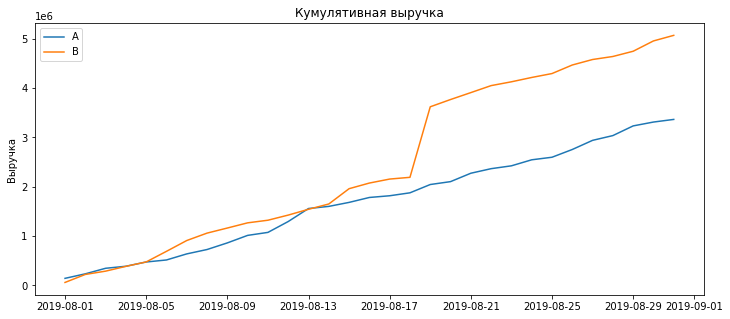

In [16]:
# Строю графики кумулятивной выручки групп А и В
fig, ax = plt.subplots(figsize=(12, 5))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.legend()
plt.title('Кумулятивная выручка')
plt.ylabel('Выручка')
plt.show()

**Вывод**

На графике видно, что выручка в обеих группах растет на протяжении всего теста. При этом в группе B наблюдается резкий всплеск, который может свидетельствовать о резком увеличении числа заказов или о появлении очень дорогих заказов. После этого всплеска выручка группы B становится значительно больше, чем группы А.

#### Построение графика кумулятивного среднего чека по группам.

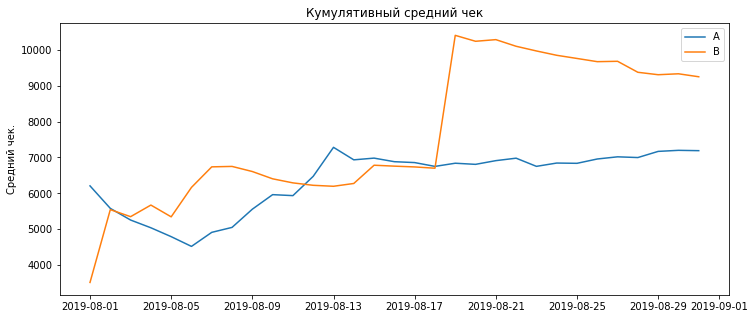

In [17]:
# Строю графики кумулятивного среднего чека групп А и В
fig, ax = plt.subplots(figsize=(12, 5))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.legend() 
plt.ylabel('Средний чек.')
plt.title('Кумулятивный средний чек')
plt.show()

**Вывод**

На графике кумулятивного среднего чека так же наблюдается резкий скачек в группе В, после которого кумулятивный средний чек в группе В становится значительно больше, чем в группе А. Вероятно в группе В была совершена крупная покупка, которая увеличила размер кумулятивного среднего чека.

#### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A.

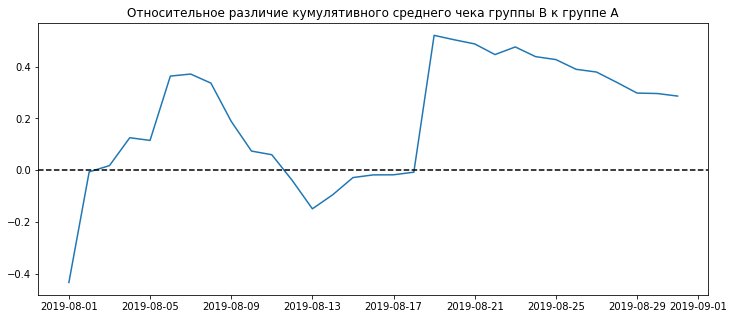

In [18]:
# Собираю данные в одном датафрейме
cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b']
)

# Строю отношение средних чеков
fig, ax = plt.subplots(figsize=(12, 5))
plt.plot(cumulative_revenue['date'], 
         (cumulative_revenue['revenue_b']/cumulative_revenue['orders_b'])/
         (cumulative_revenue['revenue_a']/cumulative_revenue['orders_a'])-1)
plt.title('Относительное различие кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

**Вывод**

На графике различия среднего чека видно, что результаты группы B нестабильны. Сначала наблюдается относительный рост суммы кумулятивного чека группы В, потом его резкий спад, и затем такой же резкий подъем, и снова относительное падение, но не ниже нулевого уровня. Возможно дело в выбросах в обеих группах.

#### Построение графика кумулятивного среднего количества заказов на посетителя по группам.

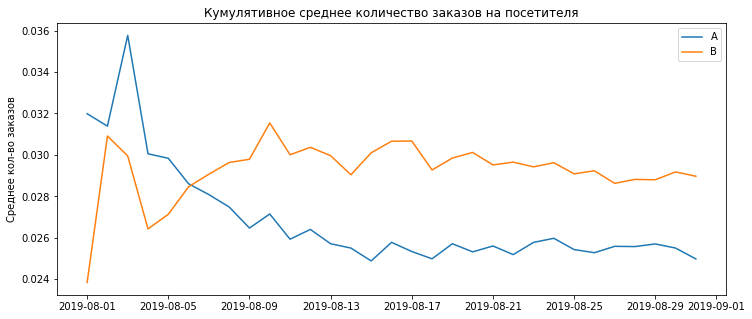

In [19]:
# Строю графики кумулятивного среднего количества заказов групп А и В
fig, ax = plt.subplots(figsize=(12, 5))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['orders']/cumulative_revenue_a['visitors'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['orders']/cumulative_revenue_b['visitors'], label='B')
plt.legend() 
plt.ylabel('Среднее кол-во заказов')
plt.title('Кумулятивное среднее количество заказов на посетителя')
plt.show()

**Вывод**

В начале теста наблюдались колебания среднего количества заказов в обеих группах. Но потом результаты группы В стабилизировались на более высоком уровне, чем в группе А.

#### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

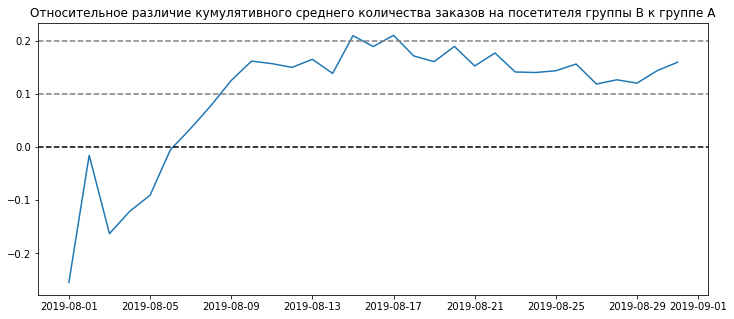

In [20]:
# Строю отношение среднего количества заказов на посетителя
fig, ax = plt.subplots(figsize=(12, 5))
plt.plot(cumulative_revenue['date'], 
         (cumulative_revenue['orders_b']/cumulative_revenue['visitors_b'])/
         (cumulative_revenue['orders_a']/cumulative_revenue['visitors_a'])-1)
plt.title('Относительное различие кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=0.1, color='grey', linestyle='--') 
plt.axhline(y=0.2, color='grey', linestyle='--') 
plt.show()

**Вывод**

На графике видно, что результаты группы B стабильно лучше группы A.

#### Построение точечного графика количества заказов по пользователям.

In [21]:
# Создаю датафрейм, в котором посчитаю количество заказов по пользователям
orders_by_visitors = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)

orders_by_visitors.columns = ['visitorid', 'orders']

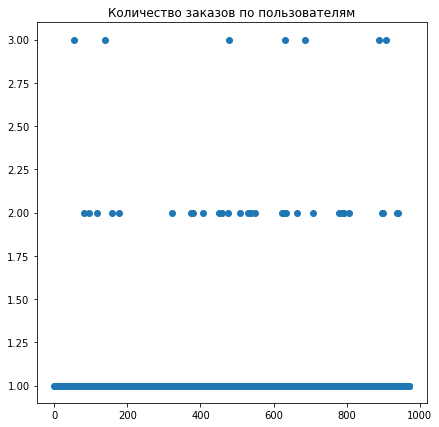

In [22]:
# Строю точечный график количества заказов по пользователям
x_values = pd.Series(range(0, len(orders_by_visitors['orders'])))
fig, ax = plt.subplots(figsize=(7, 7))
plt.scatter(x_values, orders_by_visitors['orders']) 
plt.title('Количество заказов по пользователям')
plt.show()

**Вывод**

На графике видно, что подавляющее большинство пользователей сделали по одному заказу, некоторые по 2, и очень мало по 3.

#### Расчет 95-го и 99-го перцентилей количества заказов на пользователя, выбор границы для определения аномальных пользователей.

In [23]:
# Посчитаю 95-й и 99-й перцентиль количества заказов на пользователя
np.percentile(orders_by_visitors['orders'], [95, 99])

array([1., 2.])

5% пользователей совершили более одного заказа,

1% пользователей совершили более двух заказов.

**Вывод**

Приму за аномальных пользователей тех, кто совершил более одного заказа. 

#### Построение точечного графика стоимостей заказов.

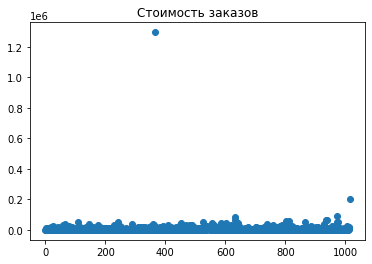

In [24]:
# Строю точечный график стоимости заказов
revenue_per_orders = orders['revenue']
x_values = pd.Series(range(0,len(revenue_per_orders)))
plt.scatter(x_values, revenue_per_orders ) 
plt.title("Стоимость заказов")
plt.show()

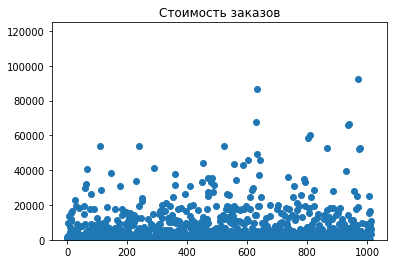

In [25]:
# Рассмотрю поближе часть графика со значением стоимости заказов до 125 тыс.
x_values = pd.Series(range(0,len(revenue_per_orders)))
plt.scatter(x_values, revenue_per_orders ) 
plt.title("Стоимость заказов")
plt.ylim(0,125000)
plt.show()

**Вывод**

На графиках видно, что подавляющее количество заказов не превышают 40 тыс. руб. Сумма некоторых заказов от 40 до 100 тыс. руб. И всего 2 заказа с аномально высокой стоимостью около 200 тыс. руб. и более 1 млн. руб.

#### Расчет 95-го и 99-го перцентилей стоимости заказов, выбор границы для определения аномальных заказов.

In [26]:
# Посчитаю 95-й и 99-й перцентиль стоимости заказов
np.percentile(revenue_per_orders, [95, 99])

array([26785., 53904.])

5% пользователей совершили заказ на сумму более 26 785 рублей,

1% пользователей совершили заказ на сумму более 53 904 рубля.

**Вывод**

Приму за аномальных пользователей тех, кто совершил заказ на сумму свыше 26 785 рублей. 

#### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Сформулирую гипотезы:

Н0 - различий в среднем количестве заказов между группами нет;

Н1 - различия в среднем между группами есть.

Задаю уровень статистической значимости alpha = 0,05.

Для тестирования воспользуюсь критерием Манна-Уитни.

In [27]:
# Подготовка данных для расчета статистической значимости
visitors_daily_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_daily_a.columns = ['date', 'visitors_per_date_a']

visitors_cummulative_a = visitors_daily_a.apply(
    lambda x: visitors_daily_a[visitors_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_a.columns = ['date', 'visitors_cummulative_a']

visitors_daily_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_daily_b.columns = ['date', 'visitors_per_date_b']

visitors_cummulative_b = visitors_daily_b.apply(
    lambda x: visitors_daily_b[visitors_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_b.columns = ['date', 'visitors_cummulative_b']

orders_daily_a = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)

In [28]:
orders_daily_a.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_cummulative_a = orders_daily_a.apply(
    lambda x: orders_daily_a[orders_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_cummulative_a.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

orders_daily_b = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_b.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_cummulative_b = orders_daily_b.apply(
    lambda x: orders_daily_b[orders_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_cummulative_b.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

In [29]:
data = (
    orders_daily_a
    .merge(orders_daily_b, left_on='date', right_on='date', how='left')
    .merge(orders_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(orders_cummulative_b, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_a, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_b, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_b, left_on='date', right_on='date', how='left')
)

In [30]:
# создаю переменные orders_by_users_a и orders_by_users_b со столбцами ['userid', 'orders'], 
# где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов 
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
orders_by_users_a.columns = ['userid', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
orders_by_users_b.columns = ['userid', 'orders']

In [31]:
# создаю переменные sample_а и sample_b, 
# в которых пользователям с заказами будет соответствовать число заказов пользователя, а пользователям без заказов — нули

sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [32]:
# Считаю статистическую значимость различия среднего количества заказов, применив тест Манна-Уитни
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(sample_a, sample_b)[1]))

print('Относительное различие в среднем количестве заказов между группами:', 
      '{0:.3f}'.format(sample_b.mean() / sample_a.mean() - 1))

p-value: 0.011
Относительное различие в среднем количестве заказов между группами: 0.160


**Вывод**

Так как p-value меньше 0.05, то по "сырым" данным различия между группами A и B есть, и нулевую гипотезу следует отвергнуть. 

Относительный выигрыш группы B равен 16,0%.

#### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

In [33]:
# Считаю статистическую значимость различия в среднем чеке заказа
print(
    'p-value:',
    '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])
)

print(
    'Относительное различие в среднем чеке заказа между группами:',
    '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)
)

p-value: 0.829
Относительное различие в среднем чеке заказа между группами: 0.287


**Вывод**

P-value больше 0.05, нет оснований отвергнуть нулевую гипотезу. То есть раличий между средними чеками нет.

При этом средний чек группы B выше среднего чека группы A на 28,7%.

#### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Расчитаю статистическую значимость после удаления аномальных пользователей.

Ранее было принято решение считать аномальными пользователей, с количеством и суммой заказов более 95-го перцентиля.

In [34]:
# Создаю срез пользователей many_orders_users с числом заказов больше 95-го перцентиля
orders_perc_95 = int(np.percentile(orders_by_visitors['orders'], [95]))
many_orders_users = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > orders_perc_95]['userid'],
        orders_by_users_b[orders_by_users_b['orders'] > orders_perc_95]['userid'],
    ],
    axis=0,
)

# Создаю срез пользователей exp_orders_users совершивших заказы дороже 95-го перцентиля
revenue_pers_95 = int(np.percentile(revenue_per_orders, [95]))
exp_orders_users = orders[orders['revenue'] > revenue_pers_95]['visitorid']

# Объединяю полученные срезы в таблице abnormal_users и удаляю дубликаты
abnormal_users = (
    pd.concat([many_orders_users, exp_orders_users], axis=0)
    .drop_duplicates()
)

In [35]:
# Создаю переменные sample_a_filtered и sample_b_filtered, 
# в которых сохраняю очищенные данные о заказах — не включая аномальных пользователей
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['userid'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['userid'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [36]:
# Считаю статистическую значимость различия среднего количества заказов по очищенным данным
print(
    'p-value:',
    '{0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1])
)
print(
    'Относительное различие в среднем количестве заказов между группами:',
    '{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1)
)

p-value: 0.011
Относительное различие в среднем количестве заказов между группами: 0.185


**Вывод**

P-value меньше 0.05 значит нулевую гипотезу следует отвергнуть и по "очищенным" данным различия между группами A и B также есть. 

Относительный выигрыш группы B увеличился и стал равен 18,5%.

#### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [37]:
# Считаю статистическую значимость различия в среднем чеке заказа по очищенным данным
print(
    'p-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительное различие в среднем чеке заказа между группами:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.727
Относительное различие в среднем чеке заказа между группами: -0.034


**Вывод**

P-value остался значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, по-прежнему нет. А вот средний чек группы B без выбросов стал ниже среднего чека группы A, хотя и не на много, всего на 3.4%.

#### Принятие решения по результатам теста.

По результатам проведенного А/В-теста можно сделать следующие выводы:
- после значительного всплеска выручка группы B становится больше, чем в группе А;
- кумулятивный средний чек в группе В стал значительно больше, чем в группе А так же после всплеска;
- относительное различие кумулятивного среднего чека группы B к группе A колеблется и становится значительно больше снова после всплеска, после чего имеет тенденцию к снижению; 
- все это говорит о наличии аномальных значений.

После удаления аномальных значений был произведен расчет статистической значимости, в результате чего было выявлено:
- между группами А и В имеются различия среднего количества заказов, среднее количество заказов в группе В на 18,5% больше, чем в группе А;
- между группами А и В отсутствуют различия в среднем чеке заказа.

Рекомендации:
- тест остановить;
- зафиксировать победу группы В в части среднего количества заказов;
- зафиксировать отсутствие различий между группами по сумме среднего чека.